# Crude Oil Prediction
<hr>

In [699]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression


<h2>Predict Present Price with Past Price</h2>

In [700]:
# Read data set
df = pd.read_csv("crude-oil-price.csv")
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


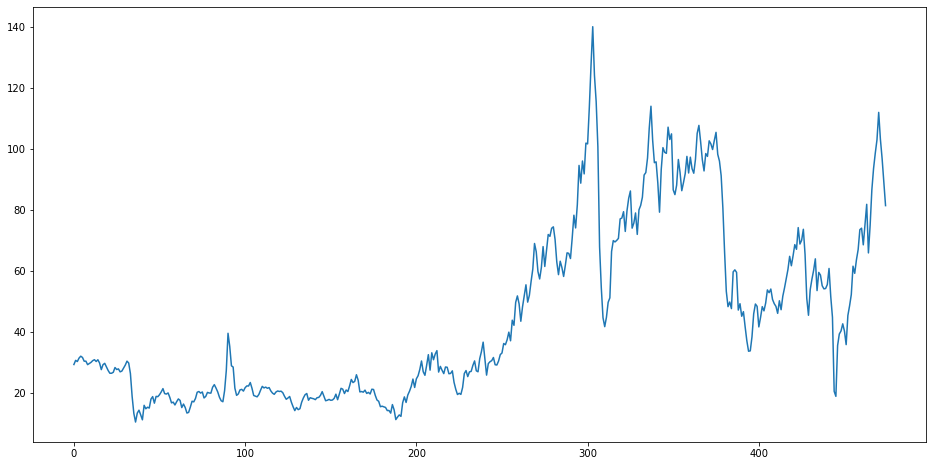

In [701]:
# Plotting
plt.figure(figsize=(16,8))
plt.plot(df["price"], label="Crude oil price")

In [702]:
# Format datetime
df['date'] = pd.to_datetime(df['date'])

In [703]:
# Prediction Present Price with Past Price
# Define our explanatory variables
# The variables we will be using at this stage, are the moving averages for the past three and nine days
df['MA3'] = df['price'].shift(1).rolling(window=3).mean()
df['MA9']= df['price'].shift(1).rolling(window=9).mean()

In [704]:
# Dropping the NaN values
df = df.dropna()

# Initialising X and assigning the two feature variables
X = df[['MA3','MA9']]
X.head()

,MA3,MA9
9,29.986667,30.564444
10,29.733333,30.601111
11,29.603333,30.528889
12,30.043333,30.562222
13,30.460000,30.503333


In [705]:
# Setting-up the dependent variable
y = df['price']
y.head()

9     29.60
10    29.98
11    30.55
12    30.85
13    30.26
Name: price, dtype: float64

In [706]:
# Setting the training set to 70% of the data
training = 0.7
t = int(training*len(df))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [707]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

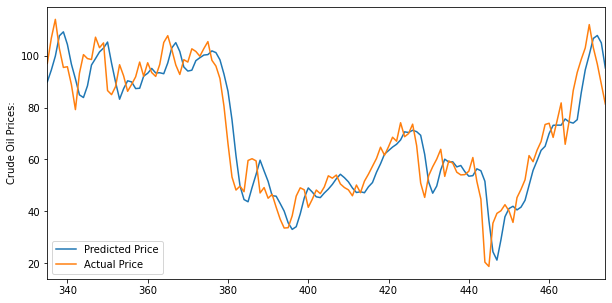

In [708]:
# Plotting our predicted price and actual price
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
df['predictedPrice'] = predicted_price
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices:")
plt.show()

In [709]:
# Cleaning data
df = df.drop(columns='MA3', axis=6).copy()
df = df.drop(columns='MA9', axis=6).copy()
df = df.dropna()
df.head()

,date,price,percentChange,change,predictedPrice
335,2011-02-01,96.97,5.184944,4.78,89.893139
336,2011-03-01,106.72,10.054656,9.75,94.450187
337,2011-04-01,113.93,6.755997,7.21,99.797370
338,2011-05-02,102.70,-9.856930,-11.23,107.595794
339,2011-06-01,95.42,-7.088608,-7.28,109.128079


In [710]:
# Display only specific datetime
df_index = df.index
index = df['date'] == '2011-03-01'
result = df_index[index]

print(df.loc[result.tolist()[0], ['date', 'price', 'predictedPrice']])

date              2011-03-01 00:00:00
price                          106.72
predictedPrice                94.4502
Name: 336, dtype: object


<h2>Predict Price with Linear Equation</h2>

In [711]:
# Read data set
df = pd.read_csv("crude-oil-price.csv")
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


Text(0, 0.5, 'price')

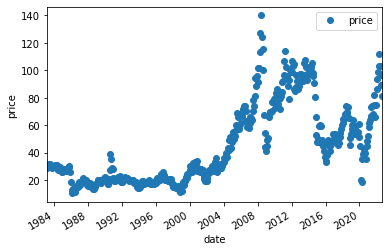

In [712]:
# Format datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Scatter plot of price
df.plot(x='date', y='price', style='o')
plt.ylabel('price')

In [713]:
# Preparing Data
X = df['date']
y = df['price'].values.reshape(-1, 1)

In [714]:
# Training Model
model = LinearRegression().fit(X.values.reshape(-1,1),y)

In [715]:
# Prediction
predictions = model.predict(X.values.astype(float).reshape(-1, 1))

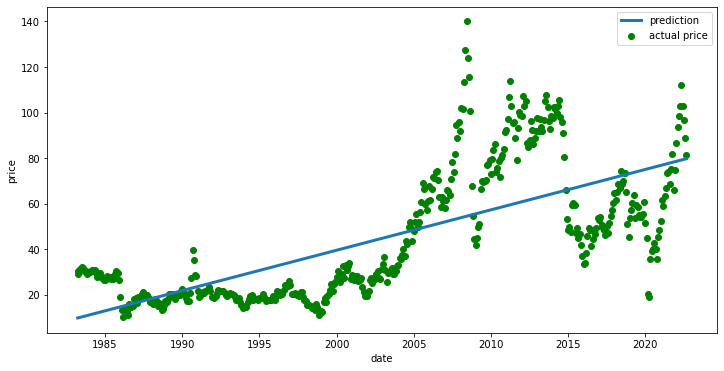

In [716]:
# Plotting
plt.figure(figsize=(12,6))
plt.scatter(X, y, label='actual price', color='green')
plt.plot(X, predictions, label='prediction', linewidth=3)
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

In [722]:
# User Input
user_input = '2022-12-01'
input_format = pd.to_datetime(user_input, format='%Y-%m-%d')
user_pred = model.predict(pd.DataFrame([input_format]).values.astype(float).reshape(-1, 1))
print(user_pred[0,0])

80.19923859553471
